In [2]:
import os
import sys
main_path = os.path.abspath(os.path.join(os.path.dirname("./resolution_search.ipynb"), '..'))
print(main_path)
sys.path.insert(0, main_path)
from src.preprocesing import get_mmbopf_plasticc_path, rearrange_splits, gen_dataset_from_h5
from src.mmmbopf.method import MMMBOPF

import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import json

data_path = get_mmbopf_plasticc_path()
print(data_path)
resolution_search_main_directory = os.path.join(data_path, "resolution_search")
print(resolution_search_main_directory)

D:\tesis
../data/plasticc/MMMBOPF
../data/plasticc/MMMBOPF\resolution_search


In [3]:
folder = os.path.join(resolution_search_main_directory, "lsa", "lsa_resolution_search")
file1 = "multi_ress_(TrMm-MmMn-MmMx-TrMn)_20210914-031605.csv"
file2 = "multi_ress_(TrMmMn-MmVaMx)_20210914-031605.csv"

In [4]:
df1 = pd.read_csv(os.path.join(folder, file1))
df1

,top-k,stack,base,wl,win,dropped,shape_before,shape_after,mean_cv,std_cv,exp_var,n_comp,scheme
0,1,2,[(win:wl)-(110.428:1)-(160.245:1)],1,160.245,0,-1,-1,0.491482,0.020462,-1.0,362,ltc
1,1,2,[(win:wl)-(110.428:1)-(232.534:1)],1,232.534,0,-1,-1,0.487830,0.024290,-1.0,362,ltc
2,1,2,[(win:wl)-(110.428:1)-(193.035:1)],1,193.035,0,-1,-1,0.486786,0.024947,-1.0,362,ltc
3,1,2,[(win:wl)-(110.428:1)-(133.025:1)],1,133.025,0,-1,-1,0.486982,0.020710,-1.0,362,ltc
4,1,2,[(win:wl)-(110.428:1)-(91.671:1)],1,91.671,0,-1,-1,0.485228,0.020650,-1.0,362,ltc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,4,2,[(win:wl)-(193.035:1)-(232.534:3)],3,232.534,0,-1,-1,0.472453,0.018555,-1.0,362,ltc
456,4,2,[(win:wl)-(193.035:1)-(193.035:3)],3,193.035,0,-1,-1,0.475617,0.020856,-1.0,362,ltc
457,4,2,[(win:wl)-(193.035:1)-(63.172:3)],3,63.172,0,-1,-1,0.438186,0.022331,-1.0,362,ltc
458,4,2,[(win:wl)-(193.035:1)-(91.671:3)],3,91.671,0,-1,-1,0.446850,0.022603,-1.0,362,ltc


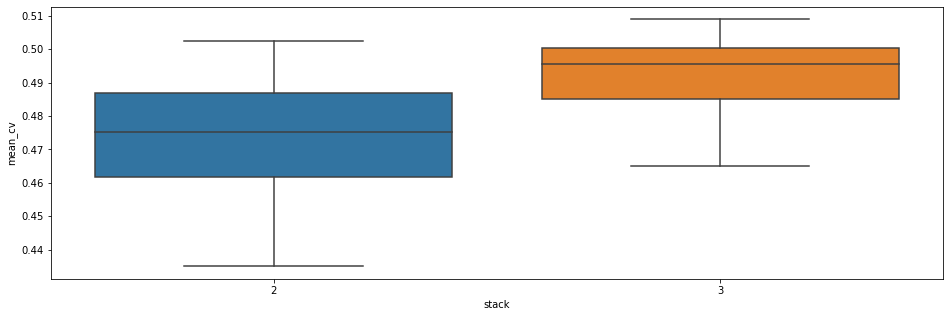

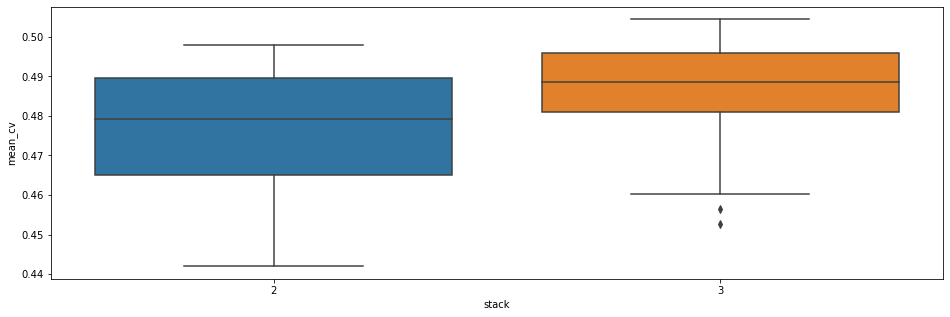

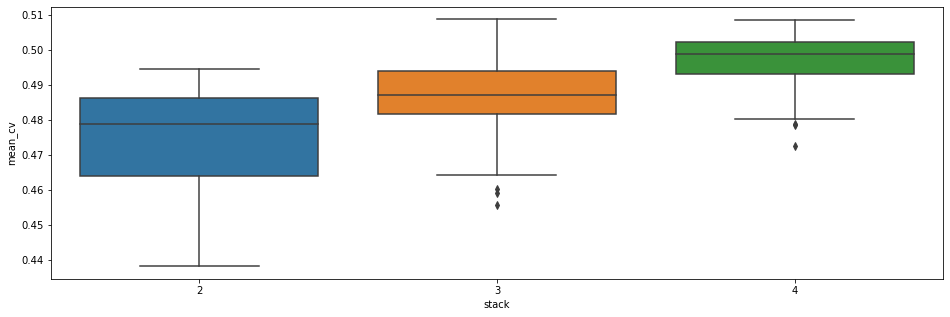

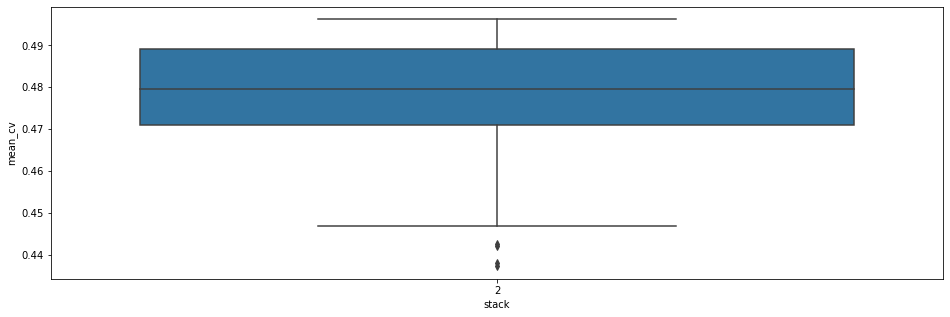

In [5]:
df1 = pd.read_csv(os.path.join(folder, file1))
top_k_list = np.unique(df1["top-k"])
for top_k in top_k_list:
    df_i = df1[df1["top-k"] == top_k]
    plt.figure(figsize=(16, 5))
    b = snb.boxplot(x="stack", y="mean_cv", data=df_i)


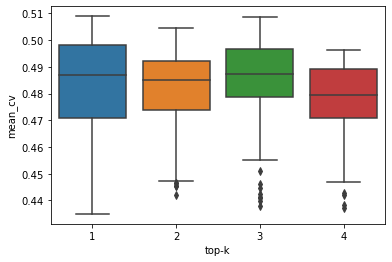

In [6]:
b = snb.boxplot(x="top-k", y="mean_cv", data=df1)

In [7]:
df11 = df1[df1["top-k"]==1]
np.unique(df11["stack"])

array([2, 3], dtype=int64)

In [31]:
df11[df11["stack"]==2]

,top-k,stack,base,wl,win,dropped,shape_before,shape_after,mean_cv,std_cv,exp_var,n_comp,scheme
0,1,2,[(win:wl)-(110.428:1)-(160.245:1)],1,160.245,0,-1,-1,0.491482,0.020462,-1.0,362,ltc
1,1,2,[(win:wl)-(110.428:1)-(232.534:1)],1,232.534,0,-1,-1,0.487830,0.024290,-1.0,362,ltc
2,1,2,[(win:wl)-(110.428:1)-(193.035:1)],1,193.035,0,-1,-1,0.486786,0.024947,-1.0,362,ltc
3,1,2,[(win:wl)-(110.428:1)-(133.025:1)],1,133.025,0,-1,-1,0.486982,0.020710,-1.0,362,ltc
4,1,2,[(win:wl)-(110.428:1)-(91.671:1)],1,91.671,0,-1,-1,0.485228,0.020650,-1.0,362,ltc
5,1,2,[(win:wl)-(110.428:1)-(280.116:1)],1,280.116,0,-1,-1,0.493815,0.022845,-1.0,362,ltc
6,1,2,[(win:wl)-(110.428:1)-(337.435:1)],1,337.435,0,-1,-1,0.496638,0.029024,-1.0,362,ltc
7,1,2,[(win:wl)-(110.428:1)-(76.099:1)],1,76.099,0,-1,-1,0.483227,0.015252,-1.0,362,ltc
8,1,2,[(win:wl)-(110.428:1)-(406.482:1)],1,406.482,0,-1,-1,0.502393,0.028121,-1.0,362,ltc
9,1,2,[(win:wl)-(110.428:1)-(63.172:1)],1,63.172,0,-1,-1,0.485888,0.016357,-1.0,362,ltc


In [39]:
def sort_quantities_by_acc(df):
    quantities = np.unique(df["quantity"])
    Q = []
    acc = []
    wl = []
    win = []
    for q in quantities:
        df_i = df[df["quantity"] == q]
        acc_i = df_i["cv_mean"].to_numpy()
        wl_i = df_i["wl"].to_numpy()
        win_i = df_i["win"].to_numpy()
        
        idx = np.argmax(acc_i)
        
        acc.append(float(acc_i[idx]))
        wl.append(int(wl_i[idx]))
        win.append(float(win_i[idx]))
        Q.append(str(q))
        
    return Q, acc, wl, win

def add_count_Qs(df):
    df["count_Qs"] = [len(x.split("-")) for x in df["quantity"]]
    return df
    
def comb_filter_only_bests(df, n_max):
    df2 = df[df["count_Qs"] == 2]
    cv_mean = df2["cv_mean"].to_numpy()
    highest_idx = np.argmax(cv_mean)
    line = df2.iloc[highest_idx]
    df_filter = ((df["count_Qs"] == 2) & (df2["quantity"] == line.quantity))
    for i in range(3,n_max):
        df2 = df[df["count_Qs"] == i]
        cv_mean = df2["cv_mean"].to_numpy()
        highest_idx = np.argmax(cv_mean)
        line = df2.iloc[highest_idx]
        df_filter |= ((df["count_Qs"] == i) & (df2["quantity"] == line.quantity))
    
    return df[df_filter]

def concat_single_best(df1, df2):
    cv_mean = df1["cv_mean"].to_numpy()
    highest_idx = np.argmax(cv_mean)
    highest_Q = df1.iloc[highest_idx].quantity
    df3 = df1[df1["quantity"] == highest_Q]
    return pd.concat([df3, df2])

def a():
    folder = os.path.join(main_path, "data", "quantity_search")
    
    filename = "double_quantity_lsa_20210903-044949"
    df_double_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
    df_double_q = df_double_q[df_double_q["valid_cv"]]
    add_count_Qs(df_double_q)
    df_double_q = df_double_q[df_double_q["quantity"] != "(MmTr)"]
    df_double_q.head()

    filename = "comb_double_quantity_lsa_20210904-024910"
    df_comb_double_q = pd.read_csv(os.path.join(folder, filename), index_col=None)
    df_comb_double_q = df_comb_double_q[df_comb_double_q["valid_cv"]]
    add_count_Qs(df_comb_double_q)
    df_comb_double_q2 = comb_filter_only_bests(df_comb_double_q, 6)
    df_comb_double_q2 = concat_single_best(df_double_q, df_comb_double_q2)
    df_comb_double_q2.head()
    
    return df_comb_double_q2
    
df_stack1 = a()
df_stack1 = df_stack1[df_stack1["quantity"] == "(MmTr-MmMn-MmMx-TrMn)"]

In [113]:
df_stack1.sort_values("cv_mean", ascending=False).iloc[0]["cv_mean"]

0.486

In [149]:
def plot_resolution(df, ax, val_name, prev_resolution = "", stack=1):
    formats = ["--o", "--v", "--P"]
    highest_acc = -1
    max_resolution = ""
    for wl, fmt in zip(np.unique(df["wl"].to_numpy()), formats):
        df_tmp = df[df["wl"]==wl].sort_values("win")
        df_best_line = df_tmp.sort_values(val_name, ascending=False).iloc[0]
        
        if df_best_line[val_name] > highest_acc:
            highest_acc = df_best_line[val_name]
            max_resolution = "(%s, %s)" % (str(df_best_line["win"]), str(df_best_line["wl"]))
        vals = df_tmp[val_name].to_numpy()
        wins = df_tmp["win"].to_numpy()
        ax.plot(wins, vals, fmt, label="%s-symbol words" % wl)
    if len(prev_resolution) > 0:
        new_max_res = ", ".join([prev_resolution, max_resolution])
    else:
        new_max_res = max_resolution
    ax.set_title("%s-levels of resolution, highest: [%s], acc: %.03f" % (stack, new_max_res, highest_acc), fontsize=16)
    ax.set_ylabel("Balanced accuracy", fontsize=15)
    ax.yaxis.set_tick_params(labelsize=14)
    ax.xaxis.set_tick_params(labelsize=14)
    return new_max_res
#     ax.axhline(highest_acc, color="k", alpha=0.5)

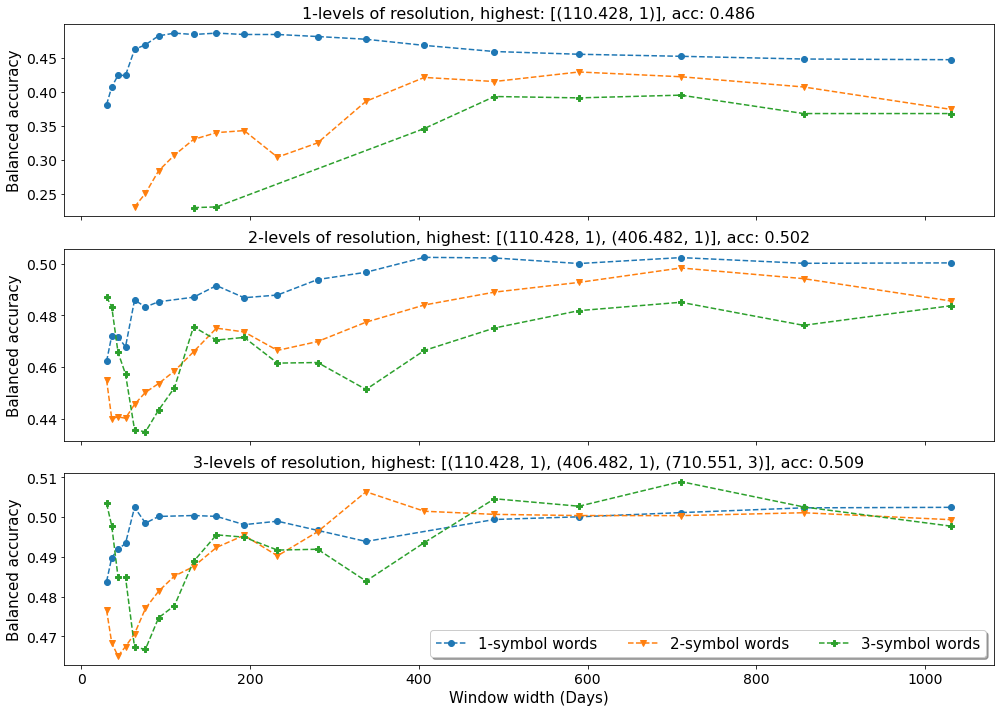

In [150]:
fig, ax = plt.subplots(3, 1, figsize=(14, 10), sharex=True)
prev_resolution = ""
prev_resolution = plot_resolution(df_stack1, ax[0], "cv_mean", stack=1, prev_resolution=prev_resolution)

prev_resolution = plot_resolution(df11[df11["stack"]==2], ax[1], "mean_cv", stack=2, prev_resolution=prev_resolution)

prev_resolution = plot_resolution(df11[df11["stack"]==3], ax[2], "mean_cv", stack=3, prev_resolution=prev_resolution)

box = ax[2].get_position()
# ax[2].set_position([box.x0, box.y0 + box.height * 0.1,
#                  box.width, box.height * 0.9])

# Put a legend below current axis
ax[2].legend(loc='lower right', fancybox=True, shadow=True, ncol=5, fontsize=15)

ax[2].set_xlabel("Window width (Days)", fontsize=15)

plt.tight_layout()
# plt.subplots_adjust(hspace=0.03)

In [3]:
print(file2)
df2 = pd.read_csv(os.path.join(folder, file2))
grouped_df2 = df2.groupby(["top-k"])
idxs = grouped_df2["mean_cv"].transform(max) == df2["mean_cv"]
max_df2 = df2[idxs]
max_df2

multi_ress_(TrMmMn-MmVaMx)_20210914-031605.csv


,top-k,stack,base,wl,win,dropped,shape_before,shape_after,mean_cv,std_cv,exp_var,n_comp,scheme
12,1,2,[(win:wl)-(160.245:1)-(1031.093:1)],1,1031.093,0,-1,-1,0.497268,0.028114,-1.0,362,ltc
85,2,2,[(win:wl)-(232.534:1)-(589.853:1)],1,589.853,0,-1,-1,0.492346,0.029756,-1.0,362,ltc
171,3,3,[(win:wl)-(110.428:1)-(710.551:1)-(710.551:2)],2,710.551,0,-1,-1,0.499328,0.030221,-1.0,362,ltc
240,4,3,[(win:wl)-(489.657:1)-(91.671:1)-(589.853:1)],1,589.853,0,-1,-1,0.498352,0.029370,-1.0,362,ltc


In [4]:
print(file1)
df1 = pd.read_csv(os.path.join(folder, file1))
grouped_df1 = df1.groupby(["top-k"])
idxs = grouped_df1["mean_cv"].transform(max) == df1["mean_cv"]
max_df1 = df1[idxs]
max_df1

multi_ress_(TrMm-MmMn-MmMx-TrMn)_20210914-031605.csv


,top-k,stack,base,wl,win,dropped,shape_before,shape_after,mean_cv,std_cv,exp_var,n_comp,scheme
82,1,3,[(win:wl)-(110.428:1)-(406.482:1)-(710.551:3)],3,710.551,0,-1,-1,0.508945,0.018823,-1.0,362,ltc
180,2,3,[(win:wl)-(160.245:1)-(855.946:2)-(91.671:1)],1,91.671,0,-1,-1,0.504430,0.017881,-1.0,362,ltc
297,3,3,[(win:wl)-(232.534:1)-(855.946:2)-(91.671:1)],1,91.671,0,-1,-1,0.508780,0.018534,-1.0,362,ltc
430,4,2,[(win:wl)-(193.035:1)-(855.946:2)],2,855.946,0,-1,-1,0.496196,0.015448,-1.0,362,ltc


In [8]:
R = [(110.428, 1), (406.482, 1), (710.551, 3)]
doc_kw = {
        "irr_handler": "#",
        "mean_bp_dist": "normal",
        "verbose": True,
    }

lsa_kw = {  # scheme: ltc
        "class_based": False,  # options: True, False
        "normalize": "l2",  # options: None, l2
        "use_idf": True,  # options: True, False
        "sublinear_tf": True  # options: True, False
    }
C = "LSA"
    
method = MMMBOPF(alpha=4, Q=None, Q_code="(TrMm-MmMn-MmMx-TrMn)", R=R, C=C, lsa_kw=lsa_kw, doc_kw=doc_kw, N=362, drop_zero_variance=False)

In [9]:
method.config_to_json(os.path.join(data_path, "optimal_config_lsa.json"))

config saving data to json:
alpha: 4 <class 'int'>
Q: [['trend', 'min_max'], ['min_max', 'min'], ['min_max', 'max'], ['trend', 'min']] <class 'list'>
R: [(110.428, 1), (406.482, 1), (710.551, 3)] <class 'list'>
docKwargs: {'irr_handler': '#', 'mean_bp_dist': 'normal', 'verbose': True, 'quantity': [], 'alphabet_size': []} <class 'dict'>
lsaKwargs: {'class_based': False, 'normalize': 'l2', 'use_idf': True, 'sublinear_tf': True} <class 'dict'>
N: 362 <class 'int'>
K: 0 <class 'int'>
maxDropped: default <class 'str'>
C: LSA <class 'str'>
dropZeroVariance: False <class 'bool'>


In [23]:
def get_dataset_variables(dataset_name):
    # read dataset
    dataset, labels_, metadata, split_folds = gen_dataset_from_h5(dataset_name, bands=_BANDS, num_folds=5)
    split_folds = rearrange_splits(split_folds)
    classes = np.unique(labels_)
    print(len(labels_))
    N = int(np.mean([len(ts[0]) * 2 for ts in dataset]))

    return dataset, labels_, metadata, split_folds, classes, N

In [27]:
_BANDS = ["lsstg", "lssti", "lsstr", "lsstu", "lssty", "lsstz"]
_, _, _, _, _, N = get_dataset_variables("plasticc_train")
print(N)

Object: 100%|█████████████████████████████████████████████████████████████████████| 7848/7848 [00:14<00:00, 524.17it/s]

7848
362
